In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [11]:
data = pd.read_excel("C:/Users/pbani/Downloads/Bike sales Dashboard.xlsx")

<Axes: >

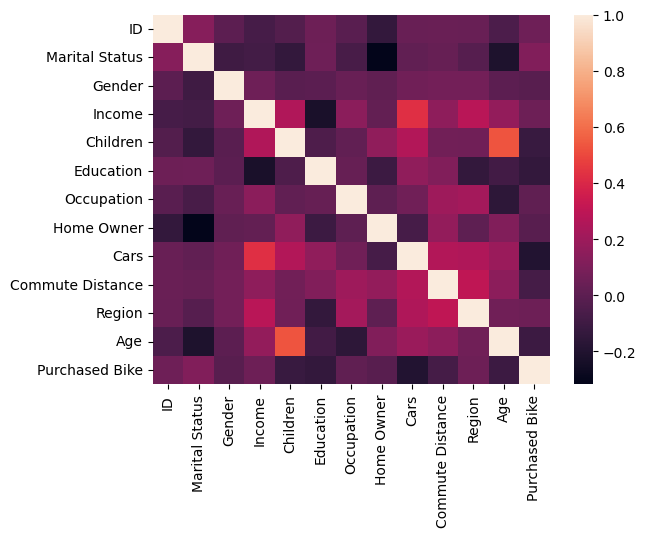

In [17]:
data.corr()
sns.heatmap(data=data.corr())

In [12]:
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [13]:
categorical_cols = ["Marital Status", "Gender", "Education", "Occupation", "Home Owner", "Commute Distance", "Region", "Purchased Bike"]
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [14]:
features = ["Income", "Children", "Cars", "Age", "Purchased Bike"]
X = data[features]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

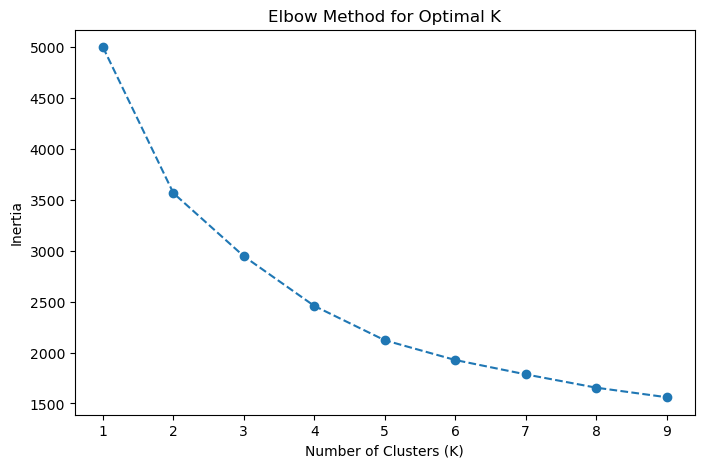

In [19]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

In [20]:
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(X_scaled)

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data["PCA1"] = X_pca[:, 0]
data["PCA2"] = X_pca[:, 1]

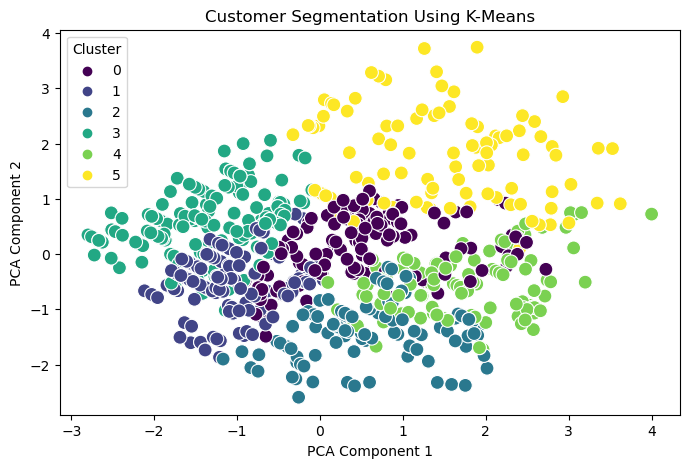

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="PCA1", y="PCA2", hue="Cluster", palette="viridis", s=100)
plt.title("Customer Segmentation Using K-Means")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [23]:
data.to_csv("customer_segments.csv", index=False)
print("Segmented customer data saved as 'customer_segments.csv'")

Segmented customer data saved as 'customer_segments.csv'


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
A = data.drop(columns=["ID", "Purchased Bike"], errors="ignore") 
b = data["Purchased Bike"]

In [26]:
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)

In [27]:
A_train, A_test, b_train, b_test = train_test_split(A_scaled, b, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(A_train, b_train)

RandomForestClassifier(random_state=42)

In [28]:
b_pred = clf.predict(A_test)

In [29]:
print("Model Accuracy:", accuracy_score(b_test, b_pred))
print("Classification Report:\n", classification_report(b_test, b_pred))

Model Accuracy: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       106
           1       1.00      0.98      0.99        94

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

